#### CSV Data

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2024-01-11 10:04:23.476321: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-11 10:04:23.750798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 10:04:23.750837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 10:04:23.787546: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 10:04:23.866928: I tensorflow/core/platform/cpu_feature_guar

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"]
)
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
# Predict the age of the sea snail from other measurements
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [5]:
# Basic regression model
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

2024-01-11 10:04:26.399795: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-11 10:04:26.518609: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-11 10:04:26.518645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-11 10:04:26.521848: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-11 10:04:26.521889: I external/local_xla/xla/stream_executor

In [6]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


2024-01-11 10:04:27.968514: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-11 10:04:28.193245: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd708007fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-11 10:04:28.193294: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2024-01-11 10:04:28.203538: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-11 10:04:28.226194: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704996268.290629     879 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 [==============================] - 1s 3ms/step - loss: 64.4689
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 13.1219
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 9.1021
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.5121
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.9723
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.5320
Epoch 7/10
104/104 [==============================] - 0s 3ms/step - loss: 7.1808
Epoch 8/10
104/104 [==============================] - 0s 4ms/step - loss: 6.9238
Epoch 9/10
104/104 [==============================] - 0s 4ms/step - loss: 6.7314
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 6.5956


#### Basic Preprocessing
- Adding a Normalization layer

In [7]:
normalize = layers.Normalization()
normalize.adapt(abalone_features) # .adapt basically makes the function set to the data so it doesn't change during training

In [8]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])
norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())
norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 93.4258
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 55.5419
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 17.7190
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 6.0586
Epoch 5/10
104/104 [==============================] - 1s 5ms/step - loss: 5.0812
Epoch 6/10
104/104 [==============================] - 1s 5ms/step - loss: 4.9770
Epoch 7/10
104/104 [==============================] - 1s 5ms/step - loss: 4.9620
Epoch 8/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9168
Epoch 9/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9302
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9311


#### Dealing with Mixed Data Types
- Implement specific preprocessing logic within the model with the Keras functional API. You can also do this with model subclassing
- For Categorical Inputs
    - `tf.keras.layers.StringLookup`
    - `tf.keras.layers.CategoryEncoding`

In [9]:
# Get titanic dataset
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [10]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [11]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform calulation
result = 2*input + 1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [12]:
calc = tf.keras.Model(inputs=input, outputs=result)
print(calc(1))
print(calc(2).numpy())

tf.Tensor(3.0, shape=(), dtype=float32)
5.0


In [13]:
# Start by building a set of symbolic keras Input objects matching the names and trypes of the CSV columns
inputs = {}
for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)
inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [14]:
# Concat numerical inputs and pass them through a normalization layer
numeric_inputs = {name:input for name,input in inputs.items() if input.dtype==tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
preprocessed_inputs = [all_numeric_inputs]

In [15]:
# For string inputs, we're basically one hot encoding
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

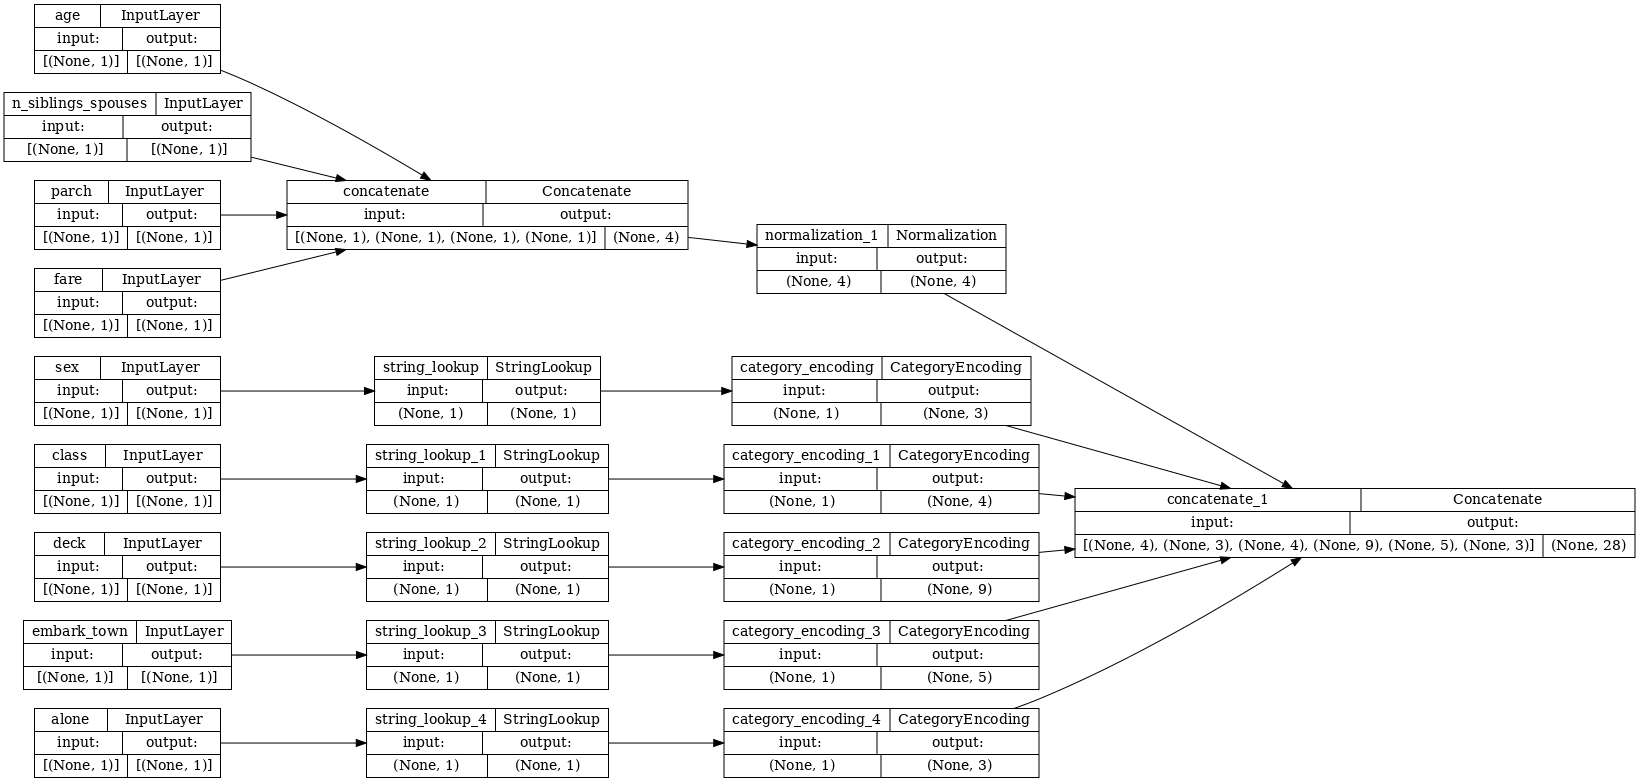

In [16]:
# This is all input preprocessing
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
tf.keras.utils.plot_model(model=titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

In [21]:
# Convert to a dictionary of tensors since Keras models don't auto convert pandas dataframes
titanic_features_dict = {name:np.array(value) for name, value in titanic_features.items()}

# Check 1st training example
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
display(features_dict)
titanic_preprocessing(features_dict)


{'sex': array(['male'], dtype=object),
 'age': array([22.]),
 'n_siblings_spouses': array([1]),
 'parch': array([0]),
 'fare': array([7.25]),
 'class': array(['Third'], dtype=object),
 'deck': array(['unknown'], dtype=object),
 'embark_town': array(['Southampton'], dtype=object),
 'alone': array(['n'], dtype=object)}

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [23]:
def titanic_model(preprocessing_head, inputs): # Pass in the input structure and the preprocessing logic
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs) # Preprocess inputs
    result = body(preprocessed_inputs) # Pass it through the body
    model = tf.keras.Model(inputs, result) # Make the model

    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam())
    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [24]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.5829
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5132
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4801
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4587
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4447
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4372
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4303
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4267
Epoch 9/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4241
Epoch 10/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4229


In [25]:
titanic_model.save('../saved_models/csv_test')
reloaded = tf.keras.models.load_model('../saved_models/csv_test')

INFO:tensorflow:Assets written to: ../saved_models/csv_test/assets


INFO:tensorflow:Assets written to: ../saved_models/csv_test/assets


In [26]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after) < 1e-3
print(before)
print(after)

tf.Tensor([[-1.805]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.805]], shape=(1, 1), dtype=float32)


#### Using tf.data
- In Memory
- Single File
- Caching
- Multiple Files

#### In Memory

In [27]:
import itertools

# manually slice up a dictionary, for each index takes the index for each feature
def slices(features):
    for i in itertools.count():
        # For each feature take index i
        example = {name:values[i] for name, values in features.items()}
        yield example

In [29]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f'{name:19s}: {value}')
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


The `tf.data` implimentation of the above is `Dataset.from_tensor_slices`

In [31]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)
# This can be iterated over like any other iterrable
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [33]:
# Make feature, label pairs
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))
# Shuffle and batch
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)
# Pass the whole dataset instead of features and labels to model fitting
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5


20/20 [==============================] - 0s 8ms/step - loss: 0.4216
Epoch 2/5
20/20 [==============================] - 0s 8ms/step - loss: 0.4223
Epoch 3/5
20/20 [==============================] - 0s 9ms/step - loss: 0.4221
Epoch 4/5
20/20 [==============================] - 0s 10ms/step - loss: 0.4196
Epoch 5/5
20/20 [==============================] - 0s 10ms/step - loss: 0.4192


#### Single File

In [34]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 [==============================] - 0s 2us/step


In [36]:
# Read from file
# Auto shuffles at buffer size = 1000, which is fine for a small dataset but might not be good for large ones
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size = 5, # Artificially small to see examples easier
    label_name='survived',
    num_epochs=1,
    ignore_errors=True
)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [38]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'female' b'male' b'male']
age                 : [22. 28. 30. 34. 24.]
n_siblings_spouses  : [0 1 0 0 0]
parch               : [0 1 0 0 1]
fare                : [  7.75   15.246  31.      6.496 247.521]
class               : [b'Third' b'Third' b'First' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'B']
embark_town         : [b'Southampton' b'Cherbourg' b'Cherbourg' b'Southampton' b'Cherbourg']
alone               : [b'y' b'n' b'y' b'y' b'n']

label               : [1 1 1 0 0]


In [40]:
# Access and Decompress traffic data
traffic_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='../data', cache_subdir='traffic'
)

   8192/Unknown - 0s 0us/step

In [41]:
traffic_ds = tf.data.experimental.make_csv_dataset(
    traffic_csv_gz,
    batch_size = 256,
    label_name = "traffic_volume",
    num_epochs=1, # Represents the number of times a dataset is repeated. If None, cycles through the dataset
    compression_type='GZIP'
)

for batch, label in traffic_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [287.6  273.18 282.66 278.2  271.23]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [20  1  0 75 75]
weather_main        : [b'Haze' b'Clear' b'Clear' b'Clouds' b'Clouds']
weather_description : [b'haze' b'sky is clear' b'Sky is Clear' b'broken clouds' b'broken clouds']
date_time           : [b'2012-11-11 14:00:00' b'2013-04-02 15:00:00' b'2013-10-12 06:00:00'
 b'2013-03-30 22:00:00' b'2013-02-24 16:00:00']

label               : [3666 5875 1548 4058 4473]


#### Caching

In [42]:
%%time

# Time without caching
for i, (batch, label) in enumerate(traffic_ds.repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: user 9.96 s, sys: 2.95 s, total: 12.9 s
Wall time: 10.5 s


In [43]:
%%time

# Time with caching
caching = traffic_ds.cache().shuffle(1000)
for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: user 1.2 s, sys: 148 ms, total: 1.34 s
Wall time: 1.26 s


In [44]:
%%time

# Time with snapshotting
snapshotting = traffic_ds.snapshot('titanic.tfsnap').shuffle(1000)
for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

2024-01-11 12:57:03.472550: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


...............................................................................................
CPU times: user 636 ms, sys: 51.1 ms, total: 687 ms
Wall time: 682 ms


#### Multiple files

In [45]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='../data', cache_subdir='fonts',
    extract=True
)

   8192/Unknown - 0s 0us/step

In [52]:
import pathlib
fonts_csvs = sorted(str(p) for p in pathlib.Path('../data/fonts/').glob('*.csv'))
print(len(fonts_csvs))
fonts_csvs[:10]

153


['../data/fonts/AGENCY.csv',
 '../data/fonts/ARIAL.csv',
 '../data/fonts/BAITI.csv',
 '../data/fonts/BANKGOTHIC.csv',
 '../data/fonts/BASKERVILLE.csv',
 '../data/fonts/BAUHAUS.csv',
 '../data/fonts/BELL.csv',
 '../data/fonts/BERLIN.csv',
 '../data/fonts/BERNARD.csv',
 '../data/fonts/BITSTREAMVERA.csv']

In [53]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="../data/fonts/*.csv", # Create a file search pattern
    batch_size=10,
    num_epochs=1,
    num_parallel_reads=20, # Sets how many files are read in parallel and interleaved together
    shuffle_buffer_size=10000 
)

In [54]:
for features in fonts_ds.take(1):
    for i, (name,value) in enumerate(features.items()):
        if i>15:
            break
        print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'FORTE' b'CONSTANTIA' b'CANDARA' b'BOOKMAN' b'FRENCH' b'ELEPHANT'
 b'STENCIL' b'REFERENCE' b'CANDARA' b'COMMERCIALSCRIPT']
fontVariant         : [b'FORTE' b'CONSTANTIA' b'CANDARA' b'BOOKMAN OLD STYLE'
 b'FRENCH SCRIPT MT' b'ELEPHANT' b'STENCIL' b'MS REFERENCE SANS SERIF'
 b'CANDARA' b'COMMERCIALSCRIPT BT']
m_label             : [  69 9471 1081  354   46  168  171 7899  336  168]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 0 0 1 0 0 0 1]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [34 25 36 35 71 40 45 33 29 46]
m_left              : [22 23 24 20 24 33 24 23 23 48]
originalH           : [45 74 48 63  6  9 27 56 56  5]
originalW           : [38 74 26 42  6 24 28 38 39 14]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [1 1 1 1 1 1 1 1 1 1]
r0c1                : [  1   1   1  17   1   1   1   1   1 146]
